In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [247]:
dataset = pd.read_excel('zomato_train.xlsx')

In [248]:
dataset.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [249]:
dataset.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

In [250]:
dataset.shape

(41373, 17)

# Cleaning the dataset

### Checking for NaN values in columns

In [251]:
dataset.isnull().any()

url                            False
address                        False
name                           False
online_order                   False
book_table                     False
votes                          False
phone                           True
location                        True
rest_type                       True
dish_liked                      True
cuisines                        True
approx_cost(for two people)     True
reviews_list                   False
menu_item                      False
listed_in(type)                False
listed_in(city)                False
rates                           True
dtype: bool

In [252]:
#name,url,address,phone cannot affect the rating so drop these columns, instead of address we will listed_in(city) column
dataset.drop(['name','url','address','phone'],axis=1,inplace=True)

In [253]:
dataset.describe(include='all')

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
count,41373,41373,41373.000000,41358,41198,18901,41341,41094,41373,41373,41373,41373,33392
unique,2,2,NaN,93,93,5026,2654,68,19556,7658,7,30,63
top,Yes,No,NaN,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM,3.9
freq,24330,36231,NaN,4077,15295,130,2348,6046,6045,31656,20778,2674,1687
mean,NaN,NaN,283.771493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,806.112459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
dataset['location'].value_counts()

BTM                      4077
HSR                      2005
Koramangala 5th Block    2002
JP Nagar                 1809
Whitefield               1717
                         ... 
Nagarbhavi                  6
Yelahanka                   4
Jakkur                      2
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [255]:
dataset['listed_in(city)'].value_counts()#.sum()

BTM                      2674
Koramangala 7th Block    2353
Koramangala 5th Block    2238
Koramangala 4th Block    2209
Koramangala 6th Block    2063
Jayanagar                1882
JP Nagar                 1699
Indiranagar              1479
Church Street            1458
MG Road                  1436
Brigade Road             1413
Lavelle Road             1390
HSR                      1377
Marathahalli             1350
Bannerghatta Road        1316
Residency Road           1307
Whitefield               1278
Brookefield              1235
Old Airport Road         1119
Kammanahalli             1061
Kalyan Nagar             1040
Basavanagudi             1022
Sarjapur Road             998
Electronic City           991
Bellandur                 979
Frazer Town               971
Malleshwaram              869
Rajajinagar               853
Banashankari              693
New BEL Road              620
Name: listed_in(city), dtype: int64

In [256]:
dataset['reviews_list'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [257]:
#we will use listed_in(city) column instead of location
#and reviews_list is little bit useful but it will long time to clean this column using NLP 
#so, we will drop these columns
dataset.drop(['location','reviews_list'],axis=1,inplace=True)

In [258]:
dataset.head()

,online_order,book_table,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city),rates
0,Yes,No,13,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,No,Yes,5015,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800",[],Dine-out,Koramangala 6th Block,4.6
2,No,No,6,Quick Bites,NaN,Kerala,250,[],Dine-out,Koramangala 4th Block,3.4
3,No,No,699,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500",[],Dine-out,Residency Road,4.3
4,Yes,No,129,Beverage Shop,NaN,"Juices, Fast Food",150,"['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [259]:
dataset.shape

(41373, 11)

In [260]:
dataset.isnull().any()

online_order                   False
book_table                     False
votes                          False
rest_type                       True
dish_liked                      True
cuisines                        True
approx_cost(for two people)     True
menu_item                      False
listed_in(type)                False
listed_in(city)                False
rates                           True
dtype: bool

In [261]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 11 columns):
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-null object
dtypes: int64(1), object(10)
memory usage: 3.5+ MB


### Filling NaN values in 'rest_type' column

In [262]:
dataset['rest_type'].isnull().sum()

175

In [263]:
dataset['rest_type'].fillna('Quick Bites', inplace = True)

### Filling NaN values in 'dish_liked' column

In [264]:
dataset['dish_liked'].isnull().sum()

22472

In [265]:
dataset.drop(['dish_liked'],axis=1,inplace=True)

### Filling NaN values in 'cuisines' column

In [266]:
dataset['cuisines'].isnull().sum()

32

In [267]:
dataset['cuisines'].value_counts()

North Indian                                                                          2348
North Indian, Chinese                                                                 1923
South Indian                                                                          1474
Bakery, Desserts                                                                       749
Biryani                                                                                732
                                                                                      ... 
Bengali, Seafood, Oriya, North Indian, Biryani                                           1
Continental, Burger, South Indian, Sandwich, Italian, Pizza, North Indian, Chinese       1
Burger, Sandwich, Pizza, Chinese                                                         1
American, Thai, Healthy Food                                                             1
North Indian, Andhra, Chinese, Seafood                                                   1

In [268]:
dataset['cuisines'].fillna('North Indian',inplace=True)

### Cleaning 'approx_cost(for two people)' column

In [269]:
dataset['approx_cost(for two people)'].isnull().sum()

279

In [270]:
dataset['approx_cost(for two people)'].value_counts()

300      6046
400      5263
500      3975
200      3871
600      2988
         ... 
5,000       1
160         1
3,700       1
60          1
3,200       1
Name: approx_cost(for two people), Length: 68, dtype: int64

In [271]:
dataset['approx_cost(for two people)'] = dataset['approx_cost(for two people)'].str.replace(',','')
dataset['approx_cost(for two people)']

0         350
1        1800
2         250
3        1500
4         150
         ... 
41368     700
41369     500
41370    1200
41371     200
41372     200
Name: approx_cost(for two people), Length: 41373, dtype: object

In [272]:
temp = dataset['approx_cost(for two people)']
temp

0         350
1        1800
2         250
3        1500
4         150
         ... 
41368     700
41369     500
41370    1200
41371     200
41372     200
Name: approx_cost(for two people), Length: 41373, dtype: object

In [273]:
temp.dropna(inplace=True)

In [274]:
temp=temp.astype(int)

In [275]:
round(temp.mean(),-2)

600.0

In [278]:
dataset['approx_cost(for two people)'] = dataset['approx_cost(for two people)'].astype(float)
dataset['approx_cost(for two people)'] = dataset['approx_cost(for two people)'].astype(pd.Int64Dtype())

In [279]:
dataset['approx_cost(for two people)'].fillna(600,inplace=True)

In [280]:
dataset['approx_cost(for two people)'].isna().sum()

0

In [340]:
#dataset['approx_cost(for two people)']=dataset['approx_cost(for two people)'].astype(int)

In [282]:
#dataset['approx_cost(for two people)']=pd.to_numeric(dataset['approx_cost(for two people)'])

In [283]:
#dataset['approx_cost(for two people)'].isna().sum()

In [284]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 10 columns):
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
rest_type                      41373 non-null object
cuisines                       41373 non-null object
approx_cost(for two people)    41373 non-null Int64
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-null object
dtypes: Int64(1), int64(1), object(8)
memory usage: 3.2+ MB


In [285]:
dataset.head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city),rates
0,Yes,No,13,Quick Bites,"North Indian, South Indian, Arabian",350,"['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,No,Yes,5015,"Casual Dining, Pub","European, Continental",1800,[],Dine-out,Koramangala 6th Block,4.6
2,No,No,6,Quick Bites,Kerala,250,[],Dine-out,Koramangala 4th Block,3.4
3,No,No,699,Casual Dining,"Thai, Chinese, Indonesian, Asian, Momos",1500,[],Dine-out,Residency Road,4.3
4,Yes,No,129,Beverage Shop,"Juices, Fast Food",150,"['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


### Handling 'menu_item ' column

In [286]:
dataset['menu_item'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [287]:
(31656/41373)*100

76.513668334421

In [288]:
dataset.drop(['menu_item'],axis=1,inplace=True) #since 76.5% of rows are empty

### Cleaning 'rates' column

In [289]:
dataset['rates'].value_counts().unique().sum()

32201

In [290]:
dataset['rates'].isnull().sum()

7981

In [291]:
41373-32201-7981

1191

In [292]:
dataset['rates'].fillna('0',inplace=True)
dataset['rates'] = dataset['rates'].replace({'-':0})

In [293]:
dataset['rates'].value_counts().sum()

41373

In [294]:
temp=dataset['rates']

In [295]:
round(temp.astype(float).mean())

3

In [296]:
dataset['rates'] = dataset['rates'].astype(float)

In [297]:
dataset['rates'] = dataset['rates'].replace({0:3})

In [298]:
dataset['rates'].value_counts()#.sum()

3.0    8853
3.9    3184
3.8    3098
3.7    3040
3.6    2661
4.0    2546
4.1    2347
3.5    2254
3.4    2007
3.3    1817
4.2    1747
3.2    1484
4.3    1358
3.1    1255
4.4     924
2.9     645
4.5     516
2.8     493
2.7     241
4.6     241
2.6     200
4.7     134
2.5      80
2.4      60
4.8      57
4.9      47
2.3      32
2.2      20
2.1      18
2.0      10
1.8       4
Name: rates, dtype: int64

# Handling categorical features

In [299]:
dataset['online_order'].value_counts()

Yes    24330
No     17043
Name: online_order, dtype: int64

In [300]:
dataset['online_order']=dataset['online_order'].replace({'Yes':1,'No':0})

In [301]:
dataset['book_table'].value_counts()

No     36231
Yes     5142
Name: book_table, dtype: int64

In [302]:
dataset['book_table'] = dataset['book_table'].replace({'Yes':1,'No':0})

In [303]:
dataset.head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rates
0,1,0,13,Quick Bites,"North Indian, South Indian, Arabian",350,Delivery,Residency Road,3.1
1,0,1,5015,"Casual Dining, Pub","European, Continental",1800,Dine-out,Koramangala 6th Block,4.6
2,0,0,6,Quick Bites,Kerala,250,Dine-out,Koramangala 4th Block,3.4
3,0,0,699,Casual Dining,"Thai, Chinese, Indonesian, Asian, Momos",1500,Dine-out,Residency Road,4.3
4,1,0,129,Beverage Shop,"Juices, Fast Food",150,Delivery,Koramangala 6th Block,3.7


In [304]:
dataset.shape

(41373, 9)

### Doing some data visualization

In [305]:
dataset.groupby('listed_in(city)').sum()

,online_order,book_table,votes,approx_cost(for two people),rates
listed_in(city),,,,,
BTM,1724,308,777195,1320190,9518.4
Banashankari,435,36,129841,281889,2466.4
Bannerghatta Road,822,93,204859,592640,4505.6
Basavanagudi,627,94,208961,451499,3662.4
Bellandur,657,108,284483,539490,3422.2
Brigade Road,728,271,526378,1084120,5190.9
Brookefield,780,107,220674,645390,4237.3
Church Street,704,293,562725,1129600,5352.9
Electronic City,449,78,90985,493440,3297.1


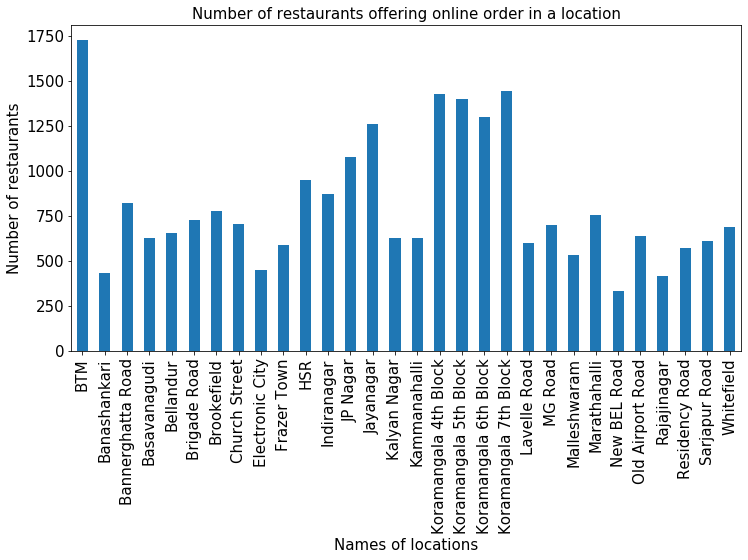

In [306]:
plt.figure(figsize=(12,6))
dataset.groupby('listed_in(city)')['online_order'].sum().plot(kind='bar')
plt.title('Number of restaurants offering online order in a location',fontsize=15)
plt.xlabel('Names of locations',fontsize=15)
plt.ylabel('Number of restaurants',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

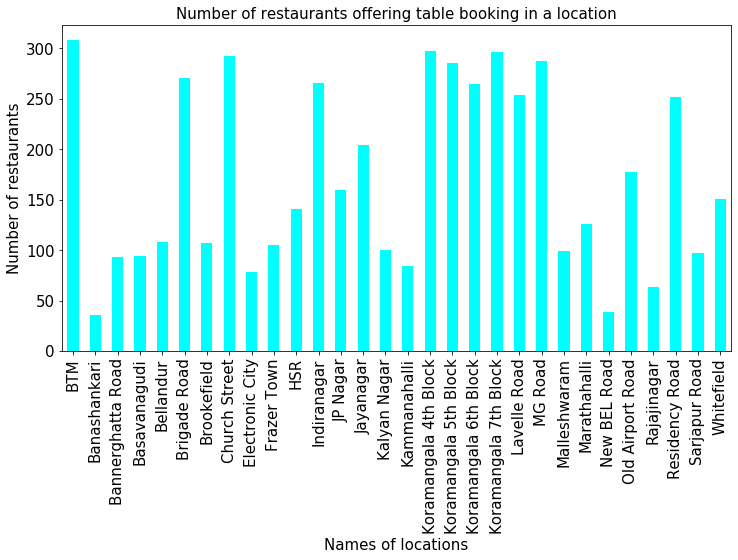

In [307]:
plt.figure(figsize=(12,6))
dataset.groupby('listed_in(city)')['book_table'].sum().plot(kind='bar',color='cyan')
plt.title('Number of restaurants offering table booking in a location',fontsize=15)
plt.xlabel('Names of locations',fontsize=15)
plt.ylabel('Number of restaurants',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

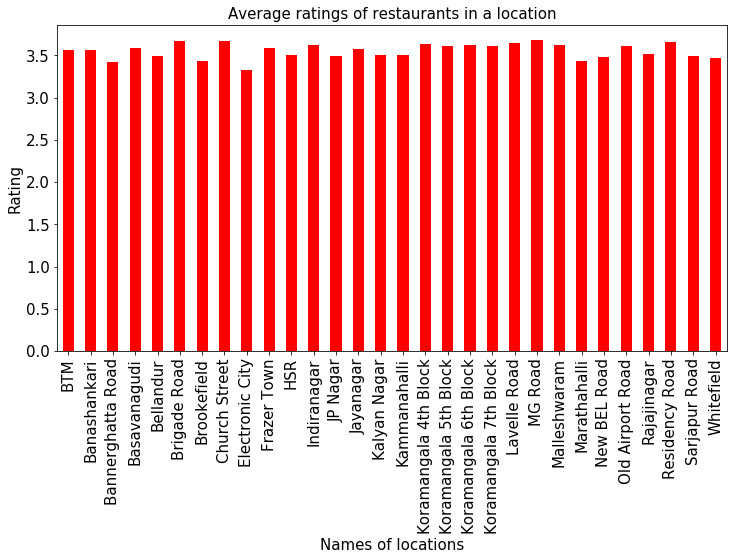

In [308]:
plt.figure(figsize=(12,6))
dataset.groupby('listed_in(city)')['rates'].mean().plot(kind='bar',color='red')
plt.title('Average ratings of restaurants in a location',fontsize=15)
plt.xlabel('Names of locations',fontsize=15)
plt.ylabel('Rating',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

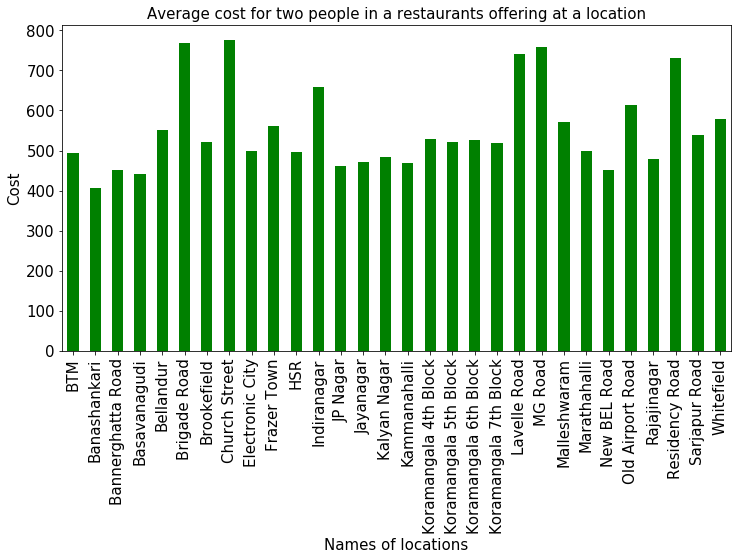

In [309]:
plt.figure(figsize=(12,6))
dataset.groupby('listed_in(city)')['approx_cost(for two people)'].mean().plot(kind='bar',color='green')
plt.title('Average cost for two people in a restaurants offering at a location',fontsize=15)
plt.xlabel('Names of locations',fontsize=15)
plt.ylabel('Cost',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [310]:
dataset.groupby('online_order').mean()

,approx_cost(for two people),book_table,rates,votes
online_order,,,,
0,598.233879,0.124215,3.449164,251.106671
1,524.338101,0.124332,3.645799,306.652980


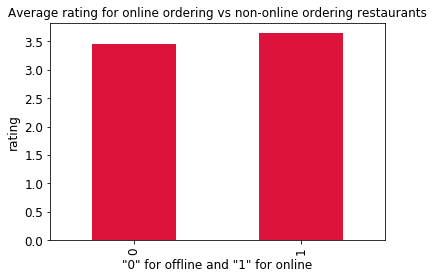

In [311]:
dataset.groupby('online_order')['rates'].mean().plot(kind='bar',color='crimson')
plt.title('Average rating for online ordering vs non-online ordering restaurants',fontsize=12)
plt.xlabel('"0" for offline and "1" for online',fontsize=12)
plt.ylabel('rating',fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [312]:
dataset.groupby('book_table').mean()

,approx_cost(for two people),online_order,rates,votes
book_table,,,,
0,452.881400,0.588032,3.486062,162.364274
1,1272.753792,0.588292,4.119584,1139.217814


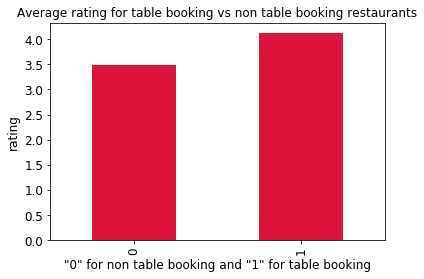

In [313]:
dataset.groupby('book_table')['rates'].mean().plot(kind='bar',color='crimson')
plt.title('Average rating for table booking vs non table booking restaurants',fontsize=12)
plt.xlabel('"0" for non table booking and "1" for table booking',fontsize=12)
plt.ylabel('rating',fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Again handling some categorical features

In [314]:
dataset['rest_type'].value_counts().count()

93

In [315]:
dataset['cuisines'].value_counts().count()

2654

In [316]:
dataset['listed_in(type)'].value_counts()

Delivery              20778
Dine-out              14224
Desserts               2838
Cafes                  1387
Drinks & nightlife      885
Buffet                  699
Pubs and bars           562
Name: listed_in(type), dtype: int64

In [317]:
temp=dataset['listed_in(type)']
temp = pd.get_dummies(dataset['listed_in(type)'],prefix='listed_in(type)')
dataset=pd.concat([dataset,temp],axis=1)
dataset.drop(['listed_in(type)'],axis=1,inplace=True)

In [318]:
temp=dataset['listed_in(city)']
temp = pd.get_dummies(dataset['listed_in(city)'],prefix='listed_in(city)')
dataset=pd.concat([dataset,temp],axis=1)
dataset.drop(['listed_in(city)'],axis=1,inplace=True)
dataset.head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),rates,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,0,13,Quick Bites,"North Indian, South Indian, Arabian",350,3.1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,5015,"Casual Dining, Pub","European, Continental",1800,4.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,6,Quick Bites,Kerala,250,3.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,699,Casual Dining,"Thai, Chinese, Indonesian, Asian, Momos",1500,4.3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,129,Beverage Shop,"Juices, Fast Food",150,3.7,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [319]:
dataset.shape

(41373, 44)

### Applying Natural Language Processing to 'rest_type' and 'cuisines' columns

In [320]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 

In [321]:
tv = TfidfVectorizer(lowercase=False)

In [322]:
def nlp(text):
    text = text.lower()
    text = re.sub('[^A-Za-z]',' ',text)
    text = nltk.word_tokenize(text)
    text = [WordNetLemmatizer().lemmatize(i) for i in text if i not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text
    

In [323]:
dataset['rest_type'] = dataset['rest_type'].apply(nlp)

In [324]:
dataset['cuisines'] = dataset['cuisines'].apply(nlp)

In [325]:
rest_temp = tv.fit_transform(dataset['rest_type'])
rest_temp = pd.DataFrame(rest_temp.toarray(),columns=tv.get_feature_names())
dataset = pd.concat([dataset,rest_temp],axis=1)
dataset.drop(['rest_type'],axis=1,inplace=True)

In [326]:
cuis_temp = tv.fit_transform(dataset['cuisines'])
cuis_temp = pd.DataFrame(cuis_temp.toarray(), columns = tv.get_feature_names())
dataset = pd.concat([dataset,cuis_temp],axis=1)
dataset.drop(['cuisines'],axis=1,inplace=True)

In [327]:
dataset.head()

,online_order,book_table,votes,approx_cost(for two people),rates,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,...,sushi,tamil,tea,tex,thai,tibetan,turkish,vegan,vietnamese,wrap
0,1,0,13,350,3.1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0,1,5015,1800,4.6,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0,0,6,250,3.4,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0,0,699,1500,4.3,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.440704,0.0,0.0,0.0,0.0,0.0
4,1,0,129,150,3.7,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


### Normalizing the dataset

In [328]:
from sklearn.preprocessing import StandardScaler

In [329]:
dataset.iloc[:,2:4]=StandardScaler().fit_transform(dataset.iloc[:,2:4].values)

In [330]:
dataset.head()

,online_order,book_table,votes,approx_cost(for two people),rates,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,...,sushi,tamil,tea,tex,thai,tibetan,turkish,vegan,vietnamese,wrap
0,1,0,-0.335902,-0.468860,3.1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0,1,5.869263,2.851057,4.6,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0,0,-0.344586,-0.697820,3.4,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0,0,0.515106,2.164178,4.3,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.440704,0.0,0.0,0.0,0.0,0.0
4,1,0,-0.192000,-0.926780,3.7,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [331]:
X=dataset.drop(['rates'],axis=1)

In [332]:
y=dataset['rates']

### Splitting the dataset

In [333]:
from sklearn.model_selection import train_test_split

In [334]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Creating ML model

In [335]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [336]:
y_pred = regressor.predict(X_test)

In [337]:
y_pred = np.round(y_pred,1)

### Checking accuracy on test set

In [338]:
from sklearn.metrics import mean_squared_error

In [339]:
mean_squared_error(y_test,y_pred)

0.07785530132130196